In [1]:
import gym
#from robot_env.cartpole import Cartpole
import numpy as np
import matplotlib.pyplot as plt
import copy 

In [2]:
NUM_EPISODES = 10000
LEARNING_RATE = 0.0
GAMMA = 0.99

# Create gym and seed numpy
env = gym.make('CartPole-v1')
nA = env.action_space.n
np.random.seed(1)

# Init weight
w = np.random.rand(4, 2)

# Keep stats for final print of graph
episode_rewards = []

In [3]:
# Our policy that maps state to action parameterized by w
def policy(state,w):
    z = state.dot(w)
    exp = np.exp(z)
    return exp/np.sum(exp)

# Vectorized softmax Jacobian
def softmax_grad(softmax):
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

In [4]:
# Main loop 
# Make sure you update your weights AFTER each episode
for e in range(NUM_EPISODES):
    if(e%2000==0 and LEARNING_RATE < 0.0008):
        LEARNING_RATE += 0.0002
    #if(e%200==0):
        #LEARNING_RATE -= 0.0001
    state = env.reset()[None,:]

    grads = []	
    rewards = []

    # Keep track of game score to print
    score = 0

    while True:

        # Uncomment to see your model train in real time (slower)
        #if (e%200==0):
            #env.render()
        #env.render()

        # Sample from policy and take action in environment
        probs = policy(state,w)
        action = np.random.choice(nA,p=probs[0])
        next_state,reward,done,_ = env.step(action)
        next_state = next_state[None,:]

        # Compute gradient and save with reward in memory for our weight updates
        dsoftmax = softmax_grad(probs)[action,:]
        dlog = dsoftmax / probs[0,action]
        grad = state.T.dot(dlog[None,:])

        grads.append(grad)
        rewards.append(reward)

        score+=reward

        # Dont forget to update your old state to the new state
        state = next_state

        if done:
            break

    # Weight update
    for i in range(len(grads)):

        # Loop through everything that happend in the episode and update towards the log policy gradient times **FUTURE** reward
        w += LEARNING_RATE * grads[i] * sum([ r * (GAMMA ** r) for t,r in enumerate(rewards[i:])])
        
    # Append for logging and print
    episode_rewards.append(score) 
    print("EP: " + str(e) + " Score: " + str(score), end="\r", flush=False) 


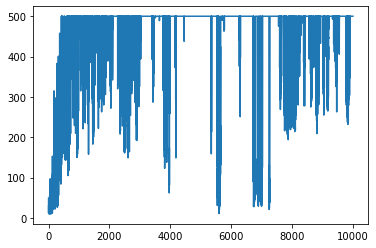

In [5]:
plt.plot(np.arange(NUM_EPISODES),episode_rewards)
plt.show()
env.close()

In [6]:
print(LEARNING_RATE)

0.0008


In [7]:
import statistics as stats
print("Mean reward: ",stats.mean(episode_rewards))
print("Std Deviation: ",stats.stdev(episode_rewards))
print("Variance: ",stats.variance(episode_rewards)/1500)

Mean reward:  442.6515
Std Deviation:  119.80271164177242
Variance:  9.56845981114778
